# load data & library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/test.csv")
submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/sampleSubmission.csv")

In [ ]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# datetime 전처리 : 파생변수 생성

In [ ]:
# 타입 변경
train["datetime"] = pd.to_datetime(train["datetime"])

# 파생변수
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

In [ ]:
# 타입 변경
test["datetime"] = pd.to_datetime(test["datetime"])

# 파생변수
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek

In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5


In [ ]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3


# EDA

## count

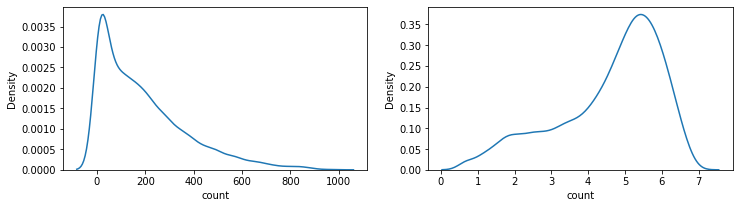

In [ ]:
# log를 count값에 적용하게 되면 한쪽에 몰려있고, 뾰족한 분포가 좀 더 완만하고, 정규분포에 가까운 모습이 됨
# 이상치에도 덜 민감하게 됨
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.kdeplot(train["count"], ax=ax[0])
sns.kdeplot(np.log1p(train["count"]), ax=ax[1])

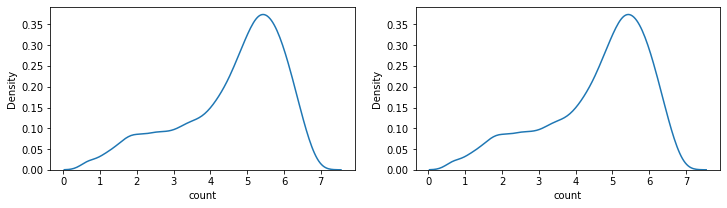

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.kdeplot(np.log(train["count"] + 1), ax=ax[0])
sns.kdeplot(np.log1p(train["count"]), ax=ax[1])

In [ ]:
train["count_log1p"] = np.log(train["count"] + 1)
train["count_log1p"]

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count_log1p, Length: 10886, dtype: float64

In [ ]:
np.exp(train["count_log1p"]) - 1

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count_log1p, Length: 10886, dtype: float64

In [ ]:
train["count_expm1"] = np.exp(train["count_log1p"]) - 1
train[["count", "count_log1p", "count_expm1"]]

,count,count_log1p,count_expm1
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0
...,...,...,...
10881,336,5.820083,336.0
10882,241,5.488938,241.0
10883,168,5.129899,168.0
10884,129,4.867534,129.0


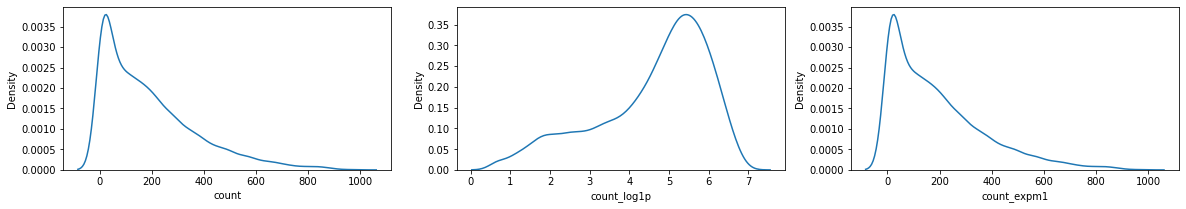

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))
sns.kdeplot(train["count"], ax=ax[0])
sns.kdeplot(train["count_log1p"], ax=ax[1])
sns.kdeplot(train["count_expm1"], ax=ax[2])

In [ ]:
train[["count", "count_log1p", "count_expm1"]].describe()

,count,count_log1p,count_expm1
count,10886.000000,10886.000000,10886.000000
mean,191.574132,4.591364,191.574132
std,181.144454,1.419454,181.144454
min,1.000000,0.693147,1.000000
25%,42.000000,3.761200,42.000000
50%,145.000000,4.983607,145.000000
75%,284.000000,5.652489,284.000000
max,977.000000,6.885510,977.000000


## casual

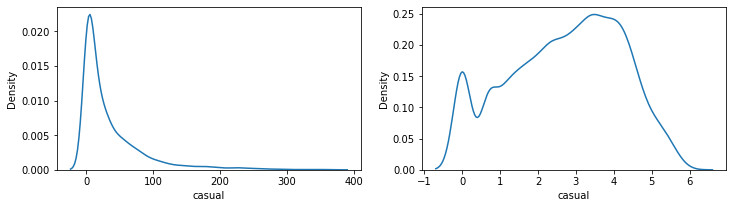

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.kdeplot(train["casual"], ax=ax[0])
sns.kdeplot(np.log1p(train["casual"]), ax=ax[1])

In [ ]:
train["casual_log1p"] = np.log(train["casual"] + 1)
train["casual_log1p"]

0        1.386294
1        2.197225
2        1.791759
3        1.386294
4        0.000000
           ...   
10881    2.079442
10882    2.397895
10883    1.609438
10884    2.564949
10885    1.609438
Name: casual_log1p, Length: 10886, dtype: float64

## registered

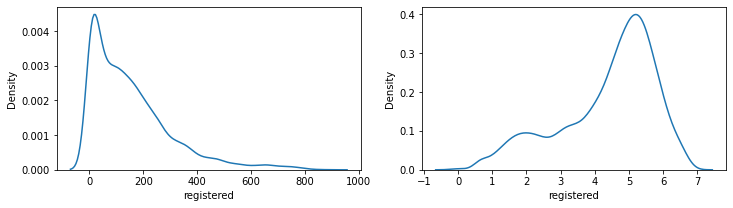

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.kdeplot(train["registered"], ax=ax[0])
sns.kdeplot(np.log1p(train["registered"]), ax=ax[1])

In [ ]:
train["registered_log1p"] = np.log(train["registered"] + 1)
train["registered_log1p"]

0        2.639057
1        3.496508
2        3.332205
3        2.397895
4        0.693147
           ...   
10881    5.799093
10882    5.446737
10883    5.105945
10884    4.770685
10885    4.442651
Name: registered_log1p, Length: 10886, dtype: float64

# feature & label

In [ ]:
label = "count_log1p"

In [ ]:
feature = train.columns.tolist()
feature

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dayofweek',
 'count_log1p',
 'casual_log1p',
 'registered_log1p']

In [ ]:
feature = [
    "season",
    'holiday',
    'workingday',
    'weather',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'year',
    'hour',
    'dayofweek'
          ]

# train & test

In [64]:
y_train = train[["casual", "registered"]]

In [65]:
X_train = train[feature]
X_test = test[feature]
# y_train = train[label]

In [66]:
X_train.shape, X_test.shape, y_train.shape

((10886, 11), (6493, 11), (10886, 2))

In [ ]:
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3


,casual,registered
0,3,13
1,8,32


# DL
[모델 참고](https://www.tensorflow.org/tutorials/keras/regression#%EB%AA%A8%EB%8D%B8)

## model1

In [ ]:
import tensorflow as tf

In [ ]:
input_shape = len(X_train.columns)
input_shape

11

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # 출력층 변경
    tf.keras.layers.Dense(1)])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae', 'mse'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1536      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
# without dropout : 0.17
# with dropout : 0.241
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
341/341 [==============================] - 2s 5ms/step - loss: 0.2877 - mae: 0.4153 - mse: 0.2877
Epoch 2/10
341/341 [==============================] - 1s 4ms/step - loss: 0.2804 - mae: 0.4099 - mse: 0.2804
Epoch 3/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2772 - mae: 0.4072 - mse: 0.2772
Epoch 4/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2815 - mae: 0.4110 - mse: 0.2815
Epoch 5/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2838 - mae: 0.4110 - mse: 0.2838
Epoch 6/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2812 - mae: 0.4089 - mse: 0.2812
Epoch 7/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2877 - mae: 0.4128 - mse: 0.2877
Epoch 8/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2754 - mae: 0.4066 - mse: 0.2754
Epoch 9/10
341/341 [==============================] - 1s 2ms/step - loss: 0.2721 - mae: 0.4026 - mse: 0.2721
Epoch 10/10
341/341

In [ ]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[2.7373135],
       [2.375709 ],
       [1.7301576],
       ...,
       [4.6679344],
       [4.404471 ],
       [4.0769725]], dtype=float32)

In [ ]:
y_pred = np.expm1(y_pred)
y_pred[:5]

array([[14.445436 ],
       [ 9.758638 ],
       [ 4.641543 ],
       [ 1.9310005],
       [ 2.3879623]], dtype=float32)

In [ ]:
submit["count"] = y_pred

In [ ]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/submit_DL.csv", index=False)

In [ ]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/submit_DL.csv")

,datetime,count
0,2011-01-20 00:00:00,14.445436
1,2011-01-20 01:00:00,9.758638
2,2011-01-20 02:00:00,4.641543
3,2011-01-20 03:00:00,1.931000
4,2011-01-20 04:00:00,2.387962
...,...,...
6488,2012-12-31 19:00:00,171.120820
6489,2012-12-31 20:00:00,152.782120
6490,2012-12-31 21:00:00,105.477580
6491,2012-12-31 22:00:00,80.815840


## model2

In [ ]:
feature = train.columns.tolist()
feature

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dayofweek',
 'count_log1p',
 'casual_log1p',
 'registered_log1p']

In [ ]:
label = ["registered_log1p", "casual_log1p"]

In [ ]:
feature = [
    "season",
    'holiday',
    'workingday',
    'weather',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'year',
    'hour',
    'dayofweek'
          ]

In [ ]:
X_train = train[feature]
X_test = test[feature]
y_train = train[label]

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((10886, 11), (6493, 11), (10886, 2))

In [67]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # 출력층 변경
    tf.keras.layers.Dense(2)])

model2.compile(optimizer='rmsprop',
              loss=['mae', 'mse'],
              metrics=['mae', 'mse'])

In [68]:
model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
341/341 [==============================] - 2s 4ms/step - loss: 73.5178 - mae: 73.5178 - mse: 14641.0322
Epoch 2/10
341/341 [==============================] - 1s 3ms/step - loss: 63.5174 - mae: 63.5174 - mse: 12497.9492
Epoch 3/10
341/341 [==============================] - 1s 3ms/step - loss: 60.7949 - mae: 60.7949 - mse: 11912.8018
Epoch 4/10
341/341 [==============================] - 1s 3ms/step - loss: 59.4524 - mae: 59.4524 - mse: 11535.3936
Epoch 5/10
341/341 [==============================] - 1s 3ms/step - loss: 58.1422 - mae: 58.1422 - mse: 11119.1865
Epoch 6/10
341/341 [==============================] - 1s 3ms/step - loss: 57.9289 - mae: 57.9289 - mse: 11118.8037
Epoch 7/10
341/341 [==============================] - 1s 3ms/step - loss: 57.5748 - mae: 57.5748 - mse: 11048.1436
Epoch 8/10
341/341 [==============================] - 1s 3ms/step - loss: 56.9651 - mae: 56.9651 - mse: 10919.0635
Epoch 9/10
341/341 [==============================] - 1s 3ms/step - loss: 56.602

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred.shape

(6493, 2)

In [71]:
y_pred

array([[ 1.38      ,  9.94      ],
       [ 0.29      ,  4.41      ],
       [ 1.78      ,  2.43      ],
       ...,
       [ 4.57      , 92.7       ],
       [ 4.07166667, 98.07266667],
       [ 3.09      , 44.27      ]])

In [ ]:
y_pred = np.expm1(y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [ ]:
submit["count"] = y_pred

In [ ]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/submit_DL.csv", index=False)

In [ ]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bike/submit_DL.csv")

# ML : RF 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
pd.DataFrame(y_predict)

,0,1
0,1.380000,9.940000
1,0.290000,4.410000
2,1.780000,2.430000
3,1.590000,1.690000
4,1.220000,1.770000
...,...,...
6488,5.640000,211.410000
6489,5.430000,165.570000
6490,4.570000,92.700000
6491,4.071667,98.072667


# RandomizedSearchCV

In [ ]:
# scoring 파라미터에 들어갈 수 있는 값
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "max_depth":np.random.randint(15, 25, 10),
    "max_features":np.random.uniform(0.7, 1, 10)
}

# 이미 count에 log를 취해 주었기 때문에 RMSLE로 계산하는 것과 동일
reg = RandomizedSearchCV(model, param_distributions=param_distributions, 
                   scoring="neg_root_mean_squared_error", n_iter=10, cv=5, verbose=2, random_state=42)

reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=15, max_features=0.8874516237373771; total time=   0.4s
[CV] END ......max_depth=15, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=15, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=15, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=15, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.8874516237373771; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.7564639785434649; total time=   0.3s
[CV] END ......max_depth=20, max_features=0.7564

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': array([22, 19, 15, 18, 20, 20, 24, 20, 15, 19]),
                                        'max_features': array([0.75646398, 0.81272166, 0.86759547, 0.88745162, 0.80177419,
       0.96893391, 0.98438845, 0.87317654, 0.90531875, 0.7313112 ])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
reg.best_params_

{'max_features': 0.7564639785434649, 'max_depth': 22}

In [ ]:
# score가 음수
# neg_root_mean_squared_error
# 추측 : 아마도 정렬을 위해 앞에 음수를 붙여준 것이 아닐까
reg.best_score_

-0.4440477431452773

In [ ]:
pd.DataFrame(reg.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.271499,0.016358,0.012040,0.000129,0.756464,22,"{'max_features': 0.7564639785434649, 'max_dept...",-0.693375,-0.369671,-0.444224,-0.328213,-0.384756,-0.444048,0.130099,1
5,0.248382,0.003360,0.011877,0.000138,0.731311,18,"{'max_features': 0.7313111979457174, 'max_dept...",-0.695968,-0.372145,-0.441375,-0.325752,-0.386076,-0.444263,0.131145,2
2,0.277264,0.011199,0.012722,0.001169,0.756464,20,"{'max_features': 0.7564639785434649, 'max_dept...",-0.698437,-0.367540,-0.438640,-0.328248,-0.390242,-0.444621,0.131833,3
4,0.264498,0.006137,0.012273,0.000232,0.801774,20,"{'max_features': 0.8017741868970256, 'max_dept...",-0.698437,-0.367540,-0.438640,-0.328248,-0.390242,-0.444621,0.131833,3
8,0.262026,0.007036,0.012168,0.000214,0.756464,19,"{'max_features': 0.7564639785434649, 'max_dept...",-0.694623,-0.367536,-0.448273,-0.324449,-0.391541,-0.445285,0.130930,5
0,0.283166,0.032187,0.012561,0.000881,0.887452,15,"{'max_features': 0.8874516237373771, 'max_dept...",-0.694821,-0.377452,-0.454387,-0.325946,-0.388850,-0.448291,0.129872,6
6,0.248952,0.007863,0.012303,0.000353,0.867595,15,"{'max_features': 0.8675954682713621, 'max_dept...",-0.694821,-0.377452,-0.454387,-0.325946,-0.388850,-0.448291,0.129872,6
7,0.229781,0.011547,0.011966,0.000185,0.756464,15,"{'max_features': 0.7564639785434649, 'max_dept...",-0.695605,-0.372190,-0.457688,-0.328585,-0.390415,-0.448897,0.130170,8
1,0.283998,0.006580,0.012784,0.000911,0.887452,20,"{'max_features': 0.8874516237373771, 'max_dept...",-0.697093,-0.373935,-0.473981,-0.326750,-0.386807,-0.451713,0.131594,9
3,0.312875,0.008294,0.012419,0.000705,0.968934,20,"{'max_features': 0.9689339096432577, 'max_dept...",-0.694959,-0.381162,-0.490000,-0.335192,-0.386592,-0.457581,0.129041,10


In [ ]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=22, max_features=0.7564639785434649, n_jobs=-1,
                      random_state=42)

# CV

In [ ]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(best_model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


array([4.24032691, 4.0062413 , 3.79048722, 2.80461323, 1.82937137])

# MSE

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_predict)

0.21412868217728778

In [ ]:
((y_train - y_valid_predict) ** 2).mean()

0.2141286821772868

# RMSE

In [ ]:
# RMSE 값이 RMSLE 값과 동일
# label인 count 값에 로그를 취해주었기 때문
mean_squared_error(y_train, y_valid_predict) ** 0.5

0.4627404047382158

In [ ]:
((y_train - y_valid_predict) ** 2).mean() ** 0.5

0.46274040473821476

In [ ]:
rmsle = abs(reg.best_score_)
rmsle

0.4440477431452773

# 예측

In [ ]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, max_features=0.7564639785434649, n_jobs=-1,
                      random_state=42)

In [ ]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([2.49607862, 1.72332234, 1.45439896, 1.45493473, 1.23745001])

# 제출

In [ ]:
submit = pd.read_csv("bike/sampleSubmission.csv")
submit.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
y_predict = np.expm1(y_predict)
y_predict[:5]

array([11.13481532,  4.60311305,  3.28190908,  3.28420382,  2.44681292])

In [ ]:
submit["count"] = y_predict

In [ ]:
submit.head()

,datetime,count
0,2011-01-20 00:00:00,11.134815
1,2011-01-20 01:00:00,4.603113
2,2011-01-20 02:00:00,3.281909
3,2011-01-20 03:00:00,3.284204
4,2011-01-20 04:00:00,2.446813


In [ ]:
file_name = f"bike/submit_{rmsle:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=False)

In [ ]:
pd.read_csv(file_name)

,datetime,count
0,2011-01-20 00:00:00,11.134815
1,2011-01-20 01:00:00,4.603113
2,2011-01-20 02:00:00,3.281909
3,2011-01-20 03:00:00,3.284204
4,2011-01-20 04:00:00,2.446813
...,...,...
6488,2012-12-31 19:00:00,181.494640
6489,2012-12-31 20:00:00,141.357400
6490,2012-12-31 21:00:00,95.894145
6491,2012-12-31 22:00:00,99.961610


/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio